In [1]:
# Set-up
%matplotlib inline
import matplotlib.pyplot as plt

# Python add-ons
import numpy as np
import pandas as pd

# 1. Variability metrics validation

In [2]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

VM = {'STOCHASTIC_MONTH': {},
      'STOCHASTIC_SC': {}}

for i in FILE:
    VM['STOCHASTIC_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/stochastic_month.csv', index_col='month').round(decimals=1)
    VM['STOCHASTIC_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/variability/{i}/stochastic_sc.csv', index_col='sc').round(decimals=1)

## 1.1. Sky conditions

<Figure size 640x480 with 0 Axes>

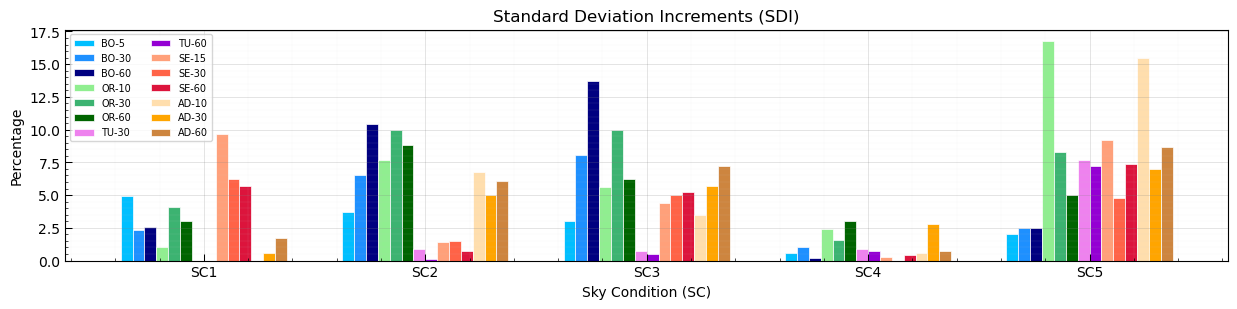

<Figure size 640x480 with 0 Axes>

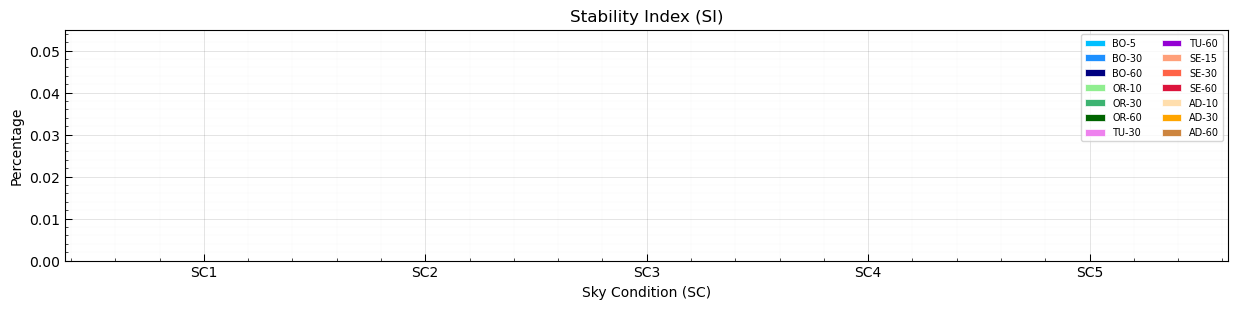

<Figure size 640x480 with 0 Axes>

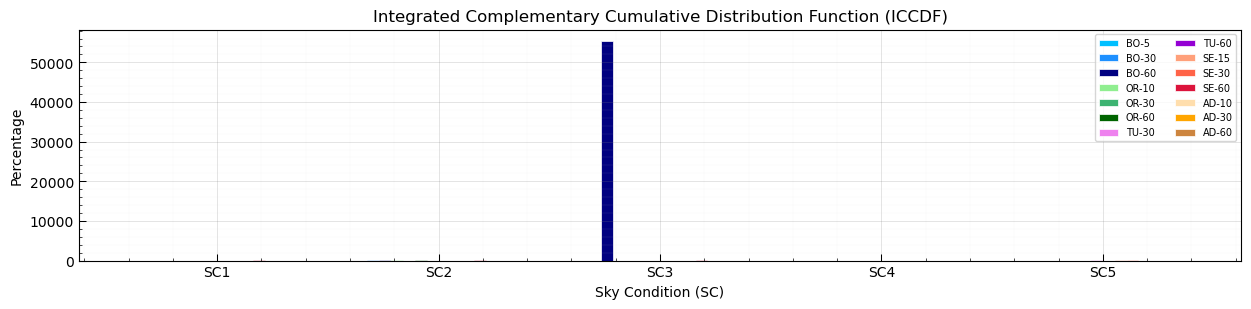

<Figure size 640x480 with 0 Axes>

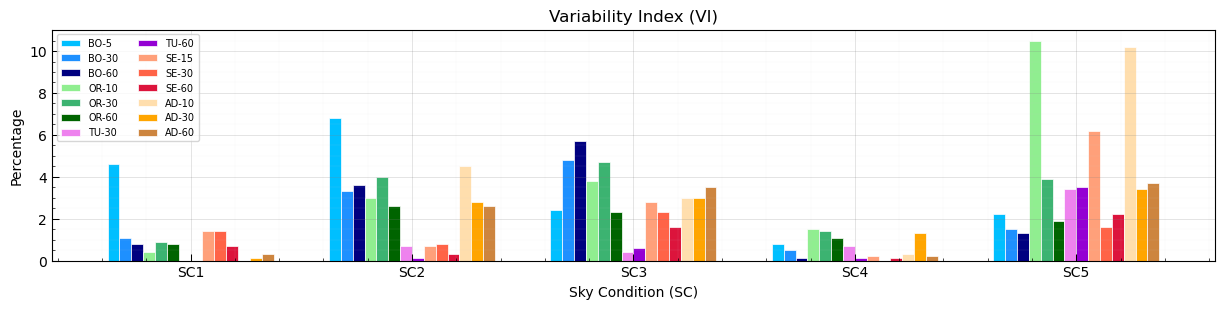

In [3]:
hor = 15
ver = 3

labels = []
colors = []

for i in FILE:
    # Labels
    a = i.split(sep='-')[0][0:2].upper()
    b = i.split(sep='-')[1]

    labels.append(f'{a}-{b}')

    # Colors
    if a == 'BO':
        if b == '30':
            colors.append('dodgerblue')
        elif b == '60':
            colors.append('navy')
        else:
            colors.append('deepskyblue')
    elif a == 'OR':
        if b == '30':
            colors.append('mediumseagreen')
        elif b == '60':
            colors.append('darkgreen')
        else:
            colors.append('lightgreen')
    elif a == 'TU':
        if b == '30':
            colors.append('violet')
        else:
            colors.append('darkviolet')
    elif a == 'SE':
        if b == '30':
            colors.append('tomato')
        elif b == '60':
            colors.append('crimson')
        else:
            colors.append('lightsalmon')
    else:
        if b == '30':
            colors.append('orange')
        elif b == '60':
            colors.append('peru')
        else:
            colors.append('navajowhite')

for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = VM['STOCHASTIC_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig10{n}.pdf', dpi=300, bbox_inches='tight')

In [4]:
df.astype(dtype=float).describe().round(decimals=1)

,SC1,SC2,SC3,SC4,SC5
count,14.0,14.0,14.0,14.0,14.0
mean,0.9,2.6,2.9,0.6,4.0
std,1.2,1.9,1.5,0.5,3.0
min,0.0,0.1,0.4,0.0,1.3
25%,0.2,0.7,2.3,0.1,2.0
50%,0.8,2.7,2.9,0.4,3.4
75%,1.0,3.5,3.7,1.0,3.8
max,4.6,6.8,5.7,1.5,10.5


In [5]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,2.3,2.6,1.0,1.3,2.0
std,1.8,1.4,1.4,1.0,1.7
min,0.5,0.8,0.0,0.1,0.1
25%,1.1,1.4,0.4,0.7,0.3
50%,1.5,3.0,0.4,1.4,2.8
75%,3.6,3.8,0.5,2.2,3.0
max,4.8,3.9,3.4,2.3,3.7


## 1.2. Months

<Figure size 640x480 with 0 Axes>

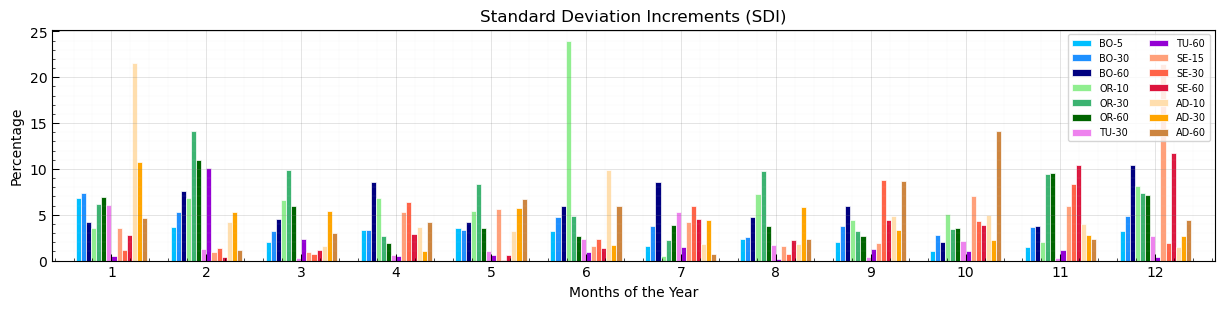

<Figure size 640x480 with 0 Axes>

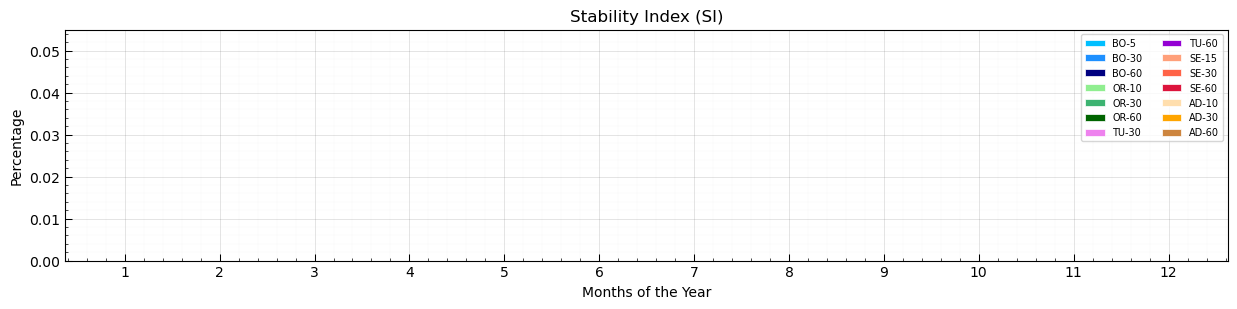

<Figure size 640x480 with 0 Axes>

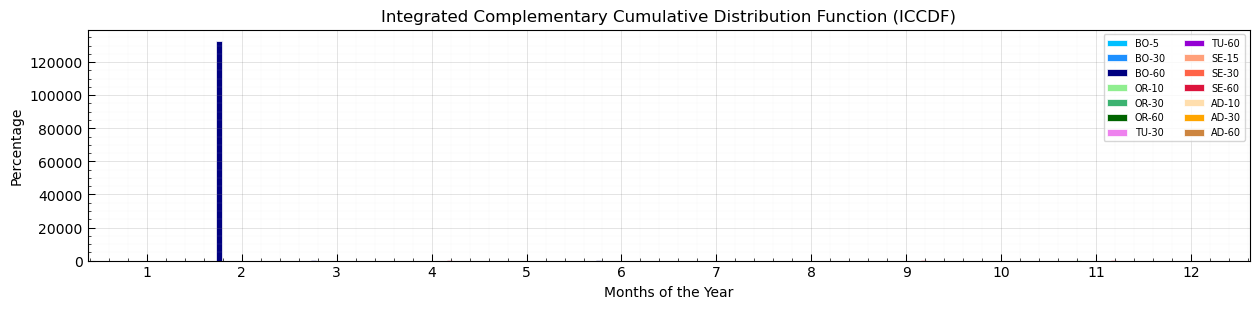

<Figure size 640x480 with 0 Axes>

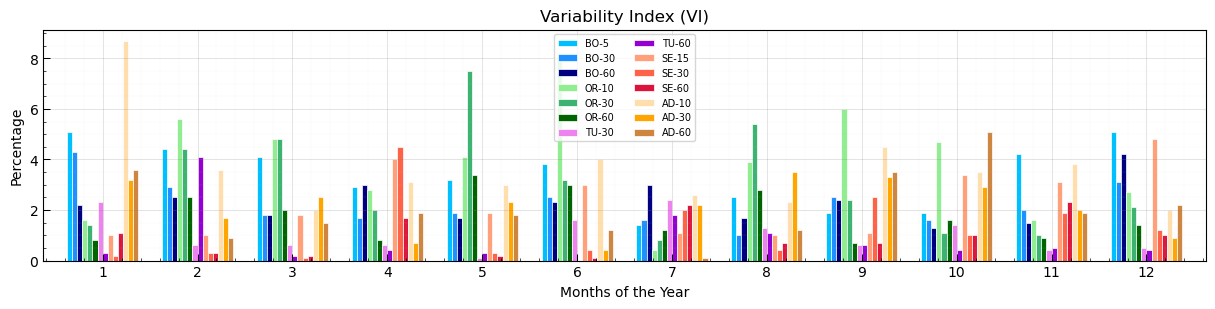

In [6]:
for i in ['standard_deviation_increments', 'stability_index', 'iccdf', 'variability_index']:
    if i == 'standard_deviation_increments':
        n = 'a'
        fig_title = f'Standard Deviation Increments (SDI)'
    elif i == 'stability_index':
        n = 'b'
        fig_title = 'Stability Index (SI)'
    elif i == 'iccdf':
        n = 'c'
        fig_title = 'Integrated Complementary Cumulative Distribution Function (ICCDF)'
    else:
        n = 'd'
        fig_title = 'Variability Index (VI)'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = VM['STOCHASTIC_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, None)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig11{n}.pdf', dpi=300, bbox_inches='tight')

In [7]:
df.astype(dtype=float).describe().round(decimals=1)

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,2.6,2.5,2.0,2.2,2.3,2.4,1.6,2.1,2.3,2.2,1.9,2.3
std,2.3,1.7,1.6,1.3,2.0,2.1,0.8,1.4,1.6,1.5,1.1,1.5
min,0.2,0.3,0.1,0.4,0.1,0.0,0.1,0.4,0.6,0.4,0.4,0.4
25%,1.0,0.9,0.8,1.0,0.6,0.6,1.1,1.0,0.8,1.2,1.1,1.0
50%,1.9,2.5,1.8,2.0,1.9,2.4,1.7,1.5,2.4,1.6,1.9,2.0
75%,3.5,4.0,2.4,3.0,3.2,3.2,2.2,2.7,3.1,3.3,2.2,3.0
max,8.7,5.6,4.8,4.5,7.5,8.0,3.0,5.4,6.0,5.1,4.2,5.1


In [8]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,2.5,2.6,0.9,1.2,2.4
std,0.9,1.4,0.7,1.1,0.8
min,1.6,0.8,0.2,0.2,1.2
25%,1.8,1.6,0.4,0.4,2.0
50%,2.2,2.2,0.7,1.0,2.1
75%,2.9,4.0,1.2,1.4,2.6
max,4.3,4.8,2.3,4.0,3.6


# 2. Statistical distribution validations

In [9]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

SD = {'STOCHASTIC_MONTH': {},
      'STOCHASTIC_SC': {}}

for i in FILE:
    SD['STOCHASTIC_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/stochastic_month.csv', index_col='month').round(decimals=1)
    SD['STOCHASTIC_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/statistical/{i}/stochastic_sc.csv', index_col='sc').round(decimals=1)

## 2.1. Sky conditions

<Figure size 640x480 with 0 Axes>

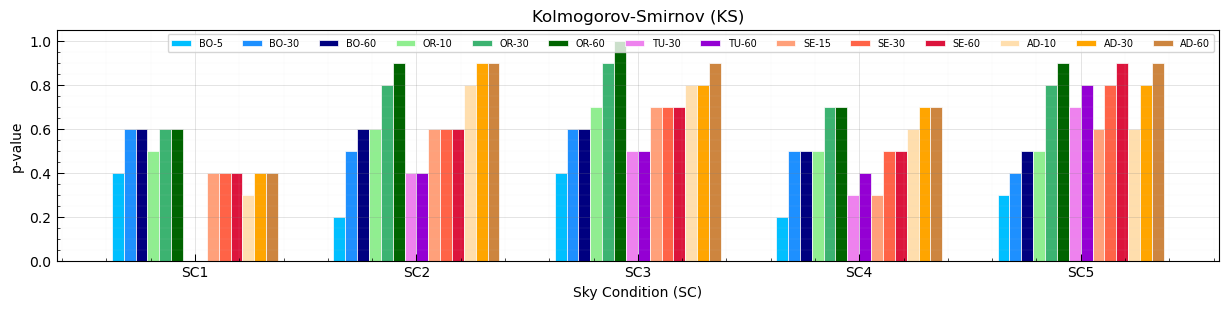

<Figure size 640x480 with 0 Axes>

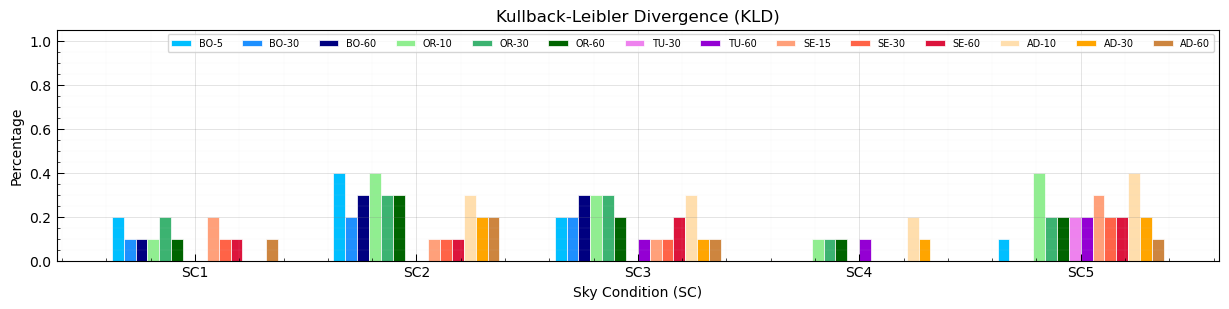

<Figure size 640x480 with 0 Axes>

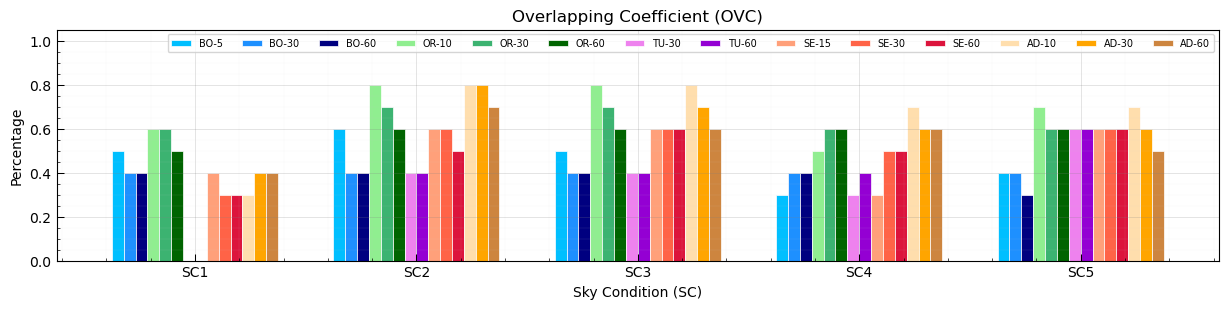

In [10]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS)'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD)'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC)'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

    for j in FILE:
        df.loc[j] = SD['STOCHASTIC_SC'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel(fig_ylabel)
    plt.xlabel('Sky Condition (SC)')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1,1))
    plt.savefig(f'../figs/fig14{n}.pdf', dpi=300, bbox_inches='tight')

In [11]:
df.astype(dtype=float).describe().round(decimals=1)

,SC1,SC2,SC3,SC4,SC5
count,14.0,14.0,14.0,14.0,14.0
mean,0.4,0.6,0.6,0.5,0.6
std,0.2,0.2,0.1,0.1,0.1
min,0.0,0.4,0.4,0.3,0.3
25%,0.3,0.4,0.4,0.4,0.5
50%,0.4,0.6,0.6,0.5,0.6
75%,0.5,0.7,0.7,0.6,0.6
max,0.6,0.8,0.8,0.7,0.7


In [12]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,0.4,0.6,0.4,0.5,0.6
std,0.0,0.1,0.2,0.1,0.1
min,0.4,0.6,0.0,0.3,0.4
25%,0.4,0.6,0.4,0.5,0.6
50%,0.4,0.6,0.4,0.6,0.6
75%,0.4,0.7,0.4,0.6,0.7
max,0.4,0.7,0.6,0.6,0.8


## 2.2. Months

<Figure size 640x480 with 0 Axes>

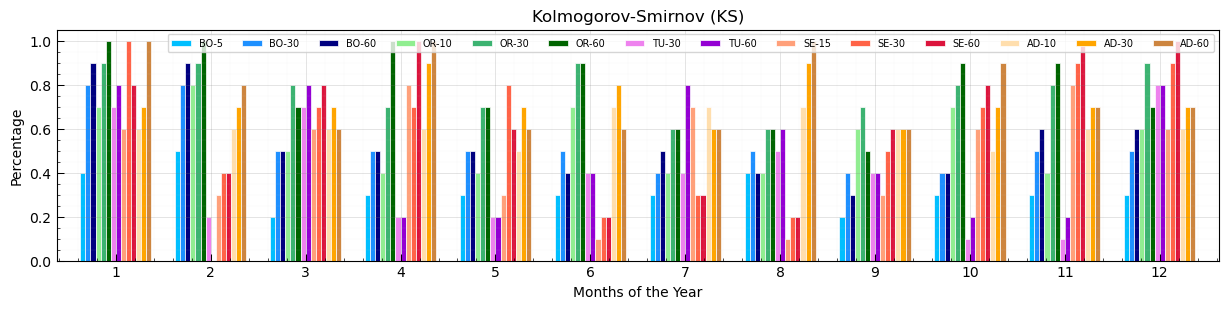

<Figure size 640x480 with 0 Axes>

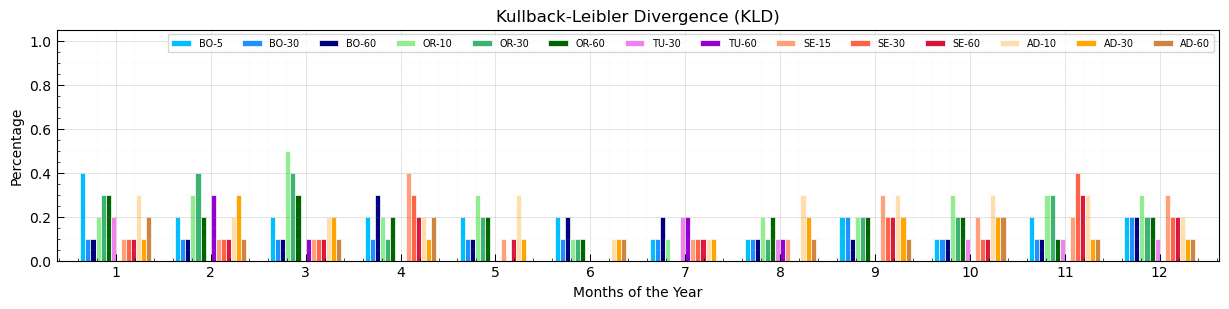

<Figure size 640x480 with 0 Axes>

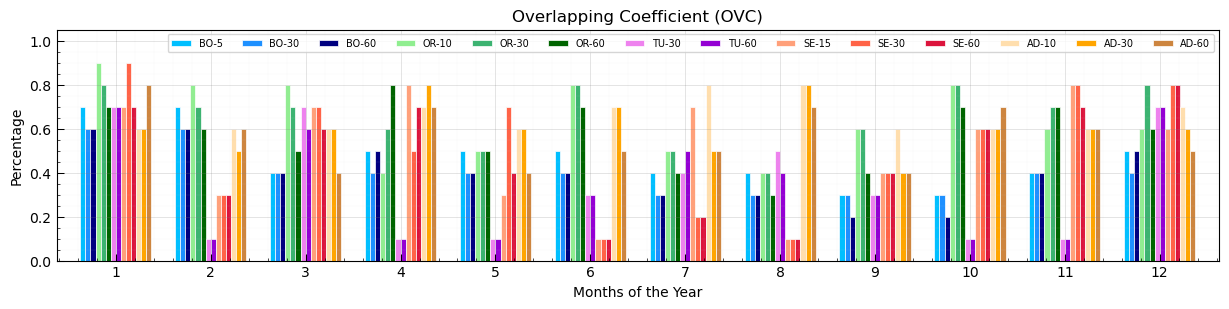

In [13]:
for i in ['kolmogorov_smirnov', 'kullback_leibler_divergence', 'overlapping_coefficient']:
    if i == 'kolmogorov_smirnov':
        n = 'a'
        fig_title = f'Kolmogorov-Smirnov (KS)'
        fig_ylabel = 'p-value'
    elif i == 'kullback_leibler_divergence':
        n = 'b'
        fig_title = 'Kullback-Leibler Divergence (KLD)'
        fig_ylabel = 'Percentage'
    else:
        n = 'c'
        fig_title = 'Overlapping Coefficient (OVC)'
        fig_ylabel = 'Percentage'

    # pd.DataFrame
    df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

    for j in FILE:
        df.loc[j] = SD['STOCHASTIC_MONTH'][j][i].values

    df.index = labels

    plt.figure()

    df.T.plot(kind='bar',
                color=colors,
                edgecolor='white',
                linewidth=0.5,
                width=0.75,
                label=labels,
                figsize=(hor,ver))

    plt.title(fig_title)
    plt.ylabel('Percentage')
    plt.xlabel('Months of the Year')
    plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
    plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(None, None)
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
    plt.tight_layout
    plt.legend(loc='best', fontsize=7, ncol=14) #, bbox_to_anchor=(1, 1))
    plt.savefig(f'../figs/fig15{n}.pdf', dpi=300, bbox_inches='tight')

In [14]:
df.astype(dtype=float).describe().round(decimals=1)

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,0.7,0.5,0.6,0.5,0.4,0.5,0.4,0.4,0.4,0.5,0.5,0.6
std,0.1,0.2,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.2,0.2,0.1
min,0.6,0.1,0.4,0.1,0.1,0.1,0.2,0.1,0.2,0.1,0.1,0.4
25%,0.6,0.3,0.4,0.4,0.4,0.3,0.3,0.3,0.3,0.3,0.4,0.5
50%,0.7,0.6,0.6,0.6,0.4,0.4,0.4,0.4,0.4,0.6,0.6,0.6
75%,0.8,0.6,0.7,0.7,0.5,0.7,0.5,0.5,0.4,0.7,0.7,0.7
max,0.9,0.8,0.8,0.8,0.7,0.8,0.8,0.8,0.6,0.8,0.8,0.8


In [15]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,0.4,0.6,0.3,0.5,0.6
std,0.1,0.1,0.2,0.3,0.1
min,0.3,0.4,0.1,0.1,0.4
25%,0.3,0.6,0.1,0.3,0.6
50%,0.4,0.6,0.3,0.5,0.6
75%,0.5,0.7,0.5,0.7,0.6
max,0.6,0.8,0.7,0.8,0.8


# 3. Energy production validation

In [16]:
FILE = ['bogota-5', 'bogota-30', 'bogota-60',
        'oregon-10', 'oregon-30', 'oregon-60',
        'tucson-30', 'tucson-60',
        'seville-15', 'seville-30', 'seville-60',
        'adelaide-10', 'adelaide-30', 'adelaide-60']

EM = {'STOCHASTIC_MONTH': {},
      'STOCHASTIC_SC': {}}

for i in FILE:
    EM['STOCHASTIC_MONTH'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/stochastic_month.csv', index_col='month').round(decimals=1)
    EM['STOCHASTIC_SC'][i] = pd.read_csv(filepath_or_buffer=f'./metrics/energy/{i}/stochastic_sc.csv', index_col='sc').round(decimals=1)

## 3.1. Sky conditions

<Figure size 640x480 with 0 Axes>

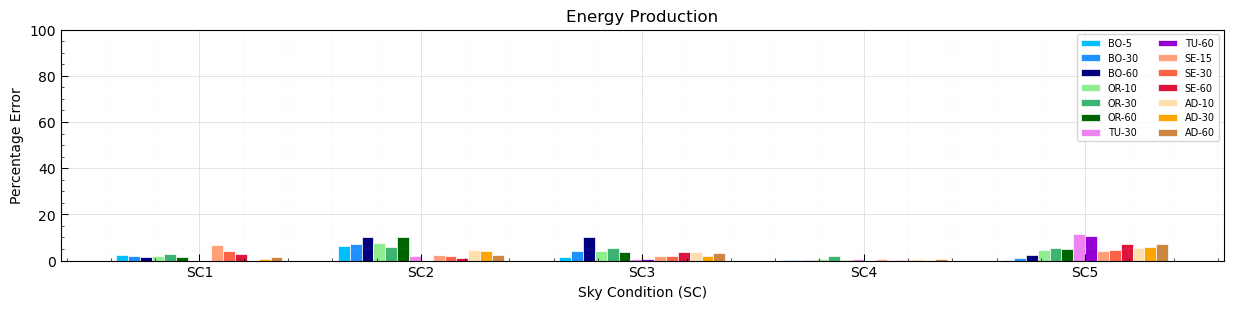

In [17]:
fig_title = 'Energy Production'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=['SC1', 'SC2', 'SC3', 'SC4', 'SC5'])

for j in FILE:
    df.loc[j] = EM['STOCHASTIC_SC'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel(fig_ylabel)
plt.xlabel('Sky Condition (SC)')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, 100)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig18a.pdf', dpi=300, bbox_inches='tight')

In [18]:
df.astype(dtype=float).describe().round(decimals=1)

,SC1,SC2,SC3,SC4,SC5
count,14.0,14.0,14.0,14.0,14.0
mean,2.0,4.7,3.4,0.5,5.4
std,1.8,3.3,2.4,0.5,3.1
min,0.0,0.0,0.6,0.0,0.4
25%,0.9,2.2,1.8,0.2,4.4
50%,1.8,4.4,3.5,0.4,5.2
75%,2.8,6.8,4.0,0.6,6.8
max,6.6,10.4,10.3,1.9,11.5


In [19]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,5.0,5.0,5.0,5.0,5.0
mean,2.9,3.9,2.6,2.6,2.9
std,2.7,2.7,4.7,1.7,2.3
min,0.2,0.9,0.0,0.4,0.5
25%,1.2,1.8,0.3,2.1,0.7
50%,2.1,4.0,0.7,2.1,3.2
75%,4.1,5.0,1.0,4.1,4.3
max,7.0,7.7,11.0,4.5,5.8


## 3.2. Months

<Figure size 640x480 with 0 Axes>

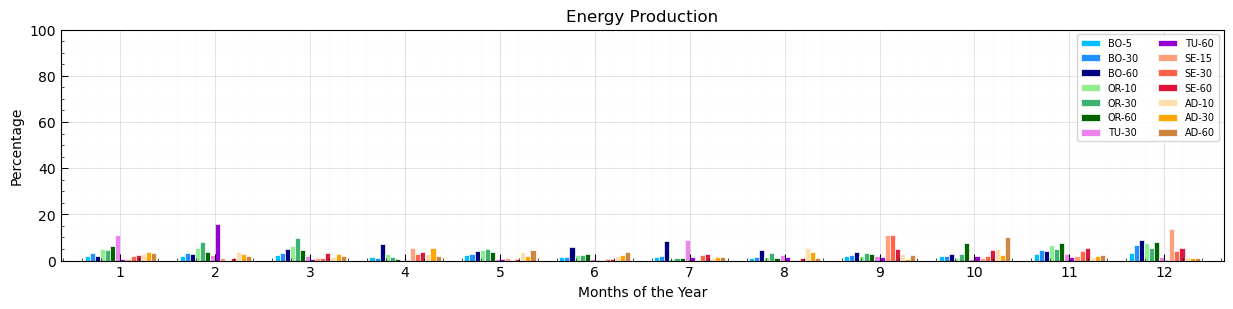

In [20]:
fig_title = 'Energy Production'
fig_ylabel = 'Percentage Error'

# pd.DataFrame
df = pd.DataFrame(index=FILE, columns=np.arange(start=1, stop=13, step=1))

for j in FILE:
    df.loc[j] = EM['STOCHASTIC_MONTH'][j]['percentage_error'].values

df.index = labels

plt.figure()

df.T.plot(kind='bar',
            color=colors,
            edgecolor='white',
            linewidth=0.5,
            width=0.75,
            label=labels,
            figsize=(hor,ver))

plt.title(fig_title)
plt.ylabel('Percentage')
plt.xlabel('Months of the Year')
plt.tick_params(which='major', direction='in', length=5, width=0.75, grid_alpha=0.3)
plt.tick_params(which='minor', direction='in', length=2.5, width=0.5, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.minorticks_on()
plt.ylim(0, 100)
plt.xlim(None, None)
plt.grid(True)
plt.grid(visible=True, which='major', color='grey', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', linewidth=0.3, alpha=0.2)
plt.tight_layout
plt.legend(loc='best', fontsize=7, ncol=2) #, bbox_to_anchor=(1,1))
plt.savefig(f'../figs/fig18b.pdf', dpi=300, bbox_inches='tight')

In [21]:
df.astype(dtype=float).describe().round(decimals=1)

,1,2,3,4,5,6,7,8,9,10,11,12
count,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,3.5,3.9,3.2,2.7,2.7,2.0,2.5,2.1,3.8,3.4,3.8,5.0
std,2.6,4.0,2.5,2.1,1.7,1.6,2.7,1.6,3.2,2.7,1.9,3.8
min,0.6,0.0,0.5,0.2,0.3,0.2,0.3,0.3,0.7,0.8,1.5,0.2
25%,2.2,1.8,1.5,1.4,1.0,0.6,1.1,1.2,2.2,1.8,2.3,1.6
50%,2.9,2.8,2.8,2.4,2.8,2.0,1.5,1.6,2.6,2.4,3.6,4.8
75%,4.3,3.9,4.2,3.4,4.2,2.6,2.4,2.9,3.6,4.2,4.7,7.6
max,11.0,15.7,9.8,7.1,4.9,6.0,9.0,5.4,11.0,10.2,7.8,13.8


In [22]:
df2 = df.T.groupby([0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4], axis=1).median().describe().round(decimals=1)
df2.columns = ['BO', 'OR', 'TU', 'SE', 'AD']
df2

,BO,OR,TU,SE,AD
count,12.0,12.0,12.0,12.0,12.0
mean,2.8,4.0,2.6,2.9,2.8
std,1.5,2.2,2.7,3.0,1.1
min,1.6,1.1,0.3,0.4,1.3
25%,2.0,2.3,0.8,0.9,2.2
50%,2.3,3.8,1.7,2.1,2.7
75%,3.1,5.6,3.0,3.8,3.4
max,6.8,7.8,9.2,10.9,5.2
